## Dataset Chosen for analysis: Titanic Dataset
Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

## Questions
<pre>
1) How many were on board and who survived and who did not survive?
2)Is the survival rate affected by Gender? If so,  Which gender had a better chance of survival?
3)Is the survival rate affected by age? If so, Which age group had a better chance of survival?
4)Is the survival rate affected by class? If so,  Which social class had a better chance of survival?
</pre>

In [33]:
##loading libraries
##%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure
import seaborn as sns
import scipy.stats as sp
import ipy_table as tbl
%pylab inline
from numbers import Number



Populating the interactive namespace from numpy and matplotlib


In [34]:
def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent

In [35]:
#loading the dataset
testfile = 'C:/Users/sampa/Desktop/Other/Udacity/Lesson 3/titanic-data.csv'
testinfo = pd.read_csv(testfile)
testinfo.head()
testinfo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Description:

The given dataset contains passenger details ranging from 1 - 891
It has PassengerID which is unique for each passsenger.

**Data Dictionary**
<pre>
**Variable** **Definition**	**Key**

survival    Survival	    0 = No, 1 = Yes
pclass 	    Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    # of siblings / spouses aboard the Titanic	
parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

</pre>
Variable Notes

Suvived set as '1' or '0' for survived or not.

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.




In [36]:
# Data Cleaning 
#missing entries in age and cabin columns

testinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can see in Age , cabin and embarked there are some missing entries.  Cabin, embarked column is not relevant to this investigation so I'm not cleaning that column. The age column can be populated by the  mean age based on sex and passenger class. 

In [37]:
age_miss = testinfo[testinfo['Age'].isnull()]

mean_age = testinfo.groupby(['Sex','Pclass'])['Age'].mean()

def update_age(row):
    if pd.isnull(row['Age']):
        return mean_age[row['Sex'],row['Pclass']]
    else:
        return row['Age']

testinfo['Age'] =testinfo.apply(update_age, axis=1)

In [38]:
testinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Analysis of data

**1) How many were on board and who survived and who did not survive?**
    Analysing the test data

In [39]:
test_passenger = len(testinfo)
test_survive = len(testinfo[testinfo.Survived==True])
test_notsurvive = test_passenger - test_survive


surv_per = calculate_percentage(test_survive,test_passenger, True) 
nonsurv_per = calculate_percentage(test_notsurvive,test_passenger, True) 

print "Total Number of passengers in test data: ", test_passenger

print "Total Number of passengers survived: ",test_survive

print "Total Number of passengers who did'nt survive:", test_notsurvive

print "The percentage of passengers who survived compared to the total sample passengers",surv_per

print "The percentage of passengers who didn't survived compared to the total sample passengers",nonsurv_per


Total Number of passengers in test data:  891
Total Number of passengers survived:  342
Total Number of passengers who did'nt survive: 549
The percentage of passengers who survived compared to the total sample passengers 38.38%
The percentage of passengers who didn't survived compared to the total sample passengers 61.62%


As we can see 
Total Number of passengers in test data:  891
Total Number of passengers survived:  342
Total Number of passengers who did'nt survive: 549
The percentage of passengers who survived compared to the total sample passengers 38.38%
The percentage of passengers who didn't survived compared to the total sample passengers 61.62%

In [40]:
#Binning the ages to make them easier to analyse

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
testinfo['age_group'] = pd.cut(testinfo.Age, range(0, 81, 10), right=False, labels=age_labels)

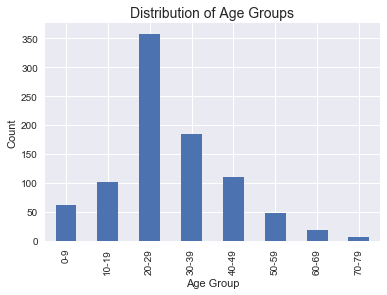

In [41]:
testinfo.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

From the plot above we can see that the majority of passengers were aged between 20-29


**2) Is the survival rate affected by Gender? If so, which gender had a better chance of survival?**



In [42]:

##Finding the number of male and female passengers

total_passengers = 891.0
female_passengers = (testinfo[testinfo['Sex'] == 'female'])
print '{} = {}'.format('Number of female passengers', len(female_passengers))
male_passengers = (testinfo[testinfo['Sex'] == 'male'])
print '{} = {}'.format('Number of male passengers', len(male_passengers))


##Finding the percentage of male and female passengers

percentage_female = len(female_passengers)/total_passengers*100
percentage_male = len(male_passengers)/total_passengers*100
print '{} = {}'.format('percent_female', percentage_female)
print '{} = {}'.format('percent_male', percentage_male)

Number of female passengers = 314
Number of male passengers = 577
percent_female = 35.241301908
percent_male = 64.758698092


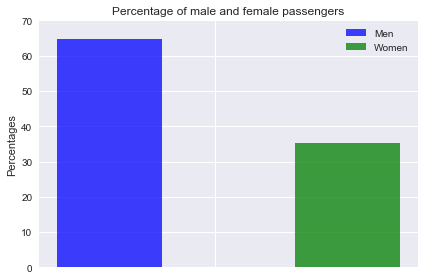

In [51]:
##Plotting the number of male and female passengers
def plot(data1, data2, title, c1, c2, n, l1,l2): 
    n_groups = 1
    means_male = (data1)
    means_female = (data2)

    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.4

    opacity = 0.75
    error_config = {'ecolor': '0.5'}

    rects1 = plt.bar(index, means_male, bar_width,
                     alpha=opacity,
                     color=c1,
                     yerr=0,
                     error_kw=error_config,
                     label=l1)

    rects2 = plt.bar(index +0.5 + bar_width, means_female, bar_width,
                     alpha=opacity,
                     color=c2,
                     yerr=0,
                     error_kw=error_config,
                     label=l2)

    plt.xlabel('')
    plt.ylabel('Percentages')
    plt.title(title)
    plt.xticks(index + bar_width, (''))
    plt.legend()
    plt.yticks(n)

    plt.tight_layout()
    plt.show()
    
plot(percentage_male, percentage_female,'Percentage of male and female passengers','b','g',np.arange(0, 80, 10), 'Men', 'Women')


Observation:
The male population aboard the Titanic was much higher than the female population. 35.24% of the passengers are female whereas the rest of the 64.75% are males


In [52]:
##Finding the percentage of female passengers who survived/did not survive

percent_female_survived = len(testinfo[(testinfo['Survived'] == 1) &  (testinfo['Sex'] == "female")])/(len(female_passengers)*1.0)*100
percent_female_notsurvived = len(testinfo[(testinfo['Survived'] == 0) &  (testinfo['Sex'] == "female")])/(len(female_passengers)*1.0)*100

print '{} = {}'.format('percent female survived', percent_female_survived)
print '{} = {}'.format('percent female notsurvived', percent_female_notsurvived)


##Finding the percentage of female passengers who survived/did not survive

percent_male_survived = len(testinfo[(testinfo['Survived'] == 1) &  (testinfo['Sex'] == "male")])/(len(male_passengers)*1.0)*100
percent_male_notsurvived = len(testinfo[(testinfo['Survived'] == 0) &  (testinfo['Sex'] == "male")])/(len(male_passengers)*1.0)*100

print '{} = {}'.format('percent male survived', percent_male_survived)
print '{} = {}'.format('percent male notsurvived', percent_male_notsurvived)

percent female survived = 74.2038216561
percent female notsurvived = 25.7961783439
percent male survived = 18.8908145581
percent male notsurvived = 81.1091854419


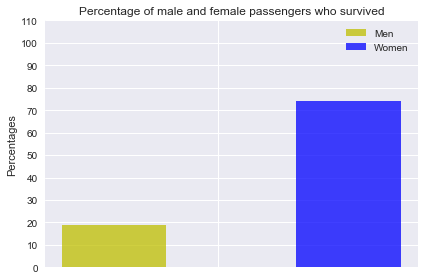

In [54]:
##Plotting the percentages of surviving males and females

plot(percent_male_survived, percent_female_survived, 'Percentage of male and female passengers who survived','y','b',np.arange(0, 120, 10),'Men', 'Women')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000104F5588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000106C8DD8>], dtype=object)

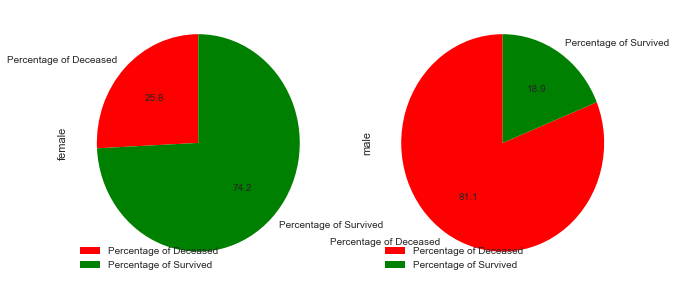

In [55]:
Survived_sex = pd.crosstab(testinfo.Sex, testinfo.Survived.astype(bool));

survived_sex_transposed = Survived_sex.transpose()
survived_sex_transposed.plot(kind='pie', subplots=True, labels=['Percentage of Deceased', 'Percentage of Survived'], colors=['r','g'], startangle=90, autopct='%.1f', figsize=[10,5])


__Observation:__
The percentage of female population who survived was much higher than the percentage of male population who had survived.
There were 577 male passengers in the sample data and  only 109 had survived. The survival rate of male passenger was a 18.89%. Out of the total 314 female passengers in the sample data 233 had survived. The survival rate of the female passenger was 74.20%
The survival rate of a female passenger was much higher than the survival rate of the male passenger.

Hypothesis Test

Null Hypothesis Ho = Gender does not improve survival chance.

Applying a **chi-square** for independence to test our null hypothesis.



In [56]:
table = pd.crosstab([testinfo['Survived']], testinfo['Sex'])
chi2, p, dof, expected = sp.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,260.7170
P-Value,0.0000


The result has shown that P-value is less than 0.05 (95 % confidence) and we reject Ho so, it implies that survival rate is affected by gender.  Alternatively this can be approached differently by calculating correlation

**3) Is the survival rate affected by age? If so, which age group had a better chance of survival?**

In [57]:
##Finding the number of children and adults who survived

number_children= len(testinfo[testinfo['Age'] < 18])
number_adults= len(testinfo[testinfo['Age'] >= 18])

##In most countries of the world, minor is legally defined as a person under the age of 18

number_children_survived= len(testinfo[(testinfo['Age'] < 18) & (testinfo['Survived'] == 1)])
number_adults_survived= len(testinfo[(testinfo['Age'] >= 18) & (testinfo['Survived'] == 1)])

print '{} = {}'.format('Number of children',  number_children)
print '{} = {}'.format('Number of adults', number_adults)
print '{} = {}'.format('Number of children who survived', number_children_survived)
print '{} = {}'.format('Number of adults who survived', number_adults_survived)

##Finding percentages of children and adults who survived

percentage_children_survived = number_children_survived*1.0/number_children * 100
percentage_adults_survived = number_adults_survived*1.0/number_adults * 100

print '{} = {}'.format('Percentage of children who had survived', percentage_children_survived)
print '{} = {}'.format('Percentage of adults who  had survived', percentage_adults_survived)

Number of children = 113
Number of adults = 778
Number of children who survived = 61
Number of adults who survived = 281
Percentage of children who had survived = 53.982300885
Percentage of adults who  had survived = 36.118251928


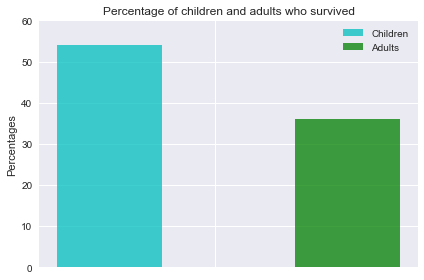

In [58]:

##Plotting the percentages of children and adults who survived

plot(percentage_children_survived, percentage_adults_survived, 'Percentage of children and adults who survived','c','g',np.arange(0, 70, 10),'Children','Adults')

In [59]:
print testinfo.groupby(['age_group']).Survived.mean()


age_group
0-9      0.612903
10-19    0.401961
20-29    0.315642
30-39    0.454054
40-49    0.354545
50-59    0.416667
60-69    0.315789
70-79    0.000000
Name: Survived, dtype: float64


__Observation:__
The percentage of children who survived is relatively greater. 53.98 percent of the children aboard RMS titanic survived whereas only 38.10 percent adults made it. The mean of suvived passengers also shows that passengers of lesser age groups had better mean of survival. The survival rate of a child is much higher than the survival rate of an adult.

Hypothesis test

Null Hypothesis Ho = Age of a passenger doesnt affect their survival.
Applying a **chi-square** for independence to test our null hypothesis.

In [60]:

table = pd.crosstab([testinfo['Survived']], testinfo['age_group'])
chi2, p, dof, expected = sp.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,29.5389
P-Value,0.0001


The result has shown that P-value is less than 0.05 (95 % confidence) and we reject Ho so, it implies that survival rate is affected by age.  Alternatively this can be approached differently by calculating correlation

In [61]:
## Method 2 by Correlation coefficient

def correlation(x, y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
        
    return (std_x*std_y).mean()
        
age = testinfo['Age']
survived=testinfo['Survived']

print correlation(age, survived)

-0.0674849756853


The correlation coefficient ranges from −1 to 1. A value of 1 implies that a linear equation describes the relationship between X and Y  for which Y increases as X increases. A value of −1 implies Y decreases as X increases. A value of 0 implies that there is no linear correlation between the variables. Here the coefficient is -0.06, __negative__ implying that as age or survived are neagitvely correlated and their means are opposite. So this means as the age increases survival decreased. By this we can people who were of less age had a better chance of survival.

**4)Is the survival rate affected by class? If so, which social class had a better chance of survival?**


In [62]:
##Finding the number of passengers belonging to first, second and third class

number_first_class= len(testinfo[testinfo['Pclass'] ==1])
number_second_class= len(testinfo[testinfo['Pclass'] ==2])
number_third_class= len(testinfo[testinfo['Pclass'] ==3])

##Finding the number of passengers belonging to first, second and third class who did survive/did not survive

number_first_class_survived= len(testinfo[(testinfo['Pclass'] == 1) & (testinfo['Survived'] == 1)])
number_second_class_survived= len(testinfo[(testinfo['Pclass'] == 2) & (testinfo['Survived'] == 1)])
number_third_class_survived= len(testinfo[(testinfo['Pclass'] == 3) & (testinfo['Survived'] == 1)])

number_first_class_notsurvived= number_first_class-number_first_class_survived
number_second_class_notsurvived= number_second_class-number_second_class_survived 
number_third_class_notsurvived= number_third_class-number_third_class_survived

print '{} = {}'.format('Number of First Class Passsengers', number_first_class)
print '{} = {}'.format('Number of Second Class Passsengers', number_second_class)
print '{} = {}'.format('Number of Third Class Passsengers', number_third_class)
print '{} = {}'.format('Number of First Class Passsengers who had survived', number_first_class_survived)
print '{} = {}'.format('Number of Second Class Passsengers who had survived', number_second_class_survived)
print '{} = {}'.format('Number of Third Class Passsengers who had survived', number_third_class_survived)
print '{} = {}'.format('Number of First Class Passsengers who didn\'t survive ', number_first_class_notsurvived )
print '{} = {}'.format('Number of Second Class Passsengers who din\'t survive',  number_second_class_notsurvived)
print '{} = {}'.format('Number of Third Class Passsengers who din\'t survive', number_third_class_notsurvived)


##Finding percentages of people belonging to the first, second, third class who did/did not survive

percentage_first_class_survived = number_first_class_survived*1.0/number_first_class * 100
percentage_second_class_survived = number_second_class_survived*1.0/number_second_class * 100
percentage_third_class_survived = number_third_class_survived*1.0/number_third_class * 100

print '{} = {}'.format('percentage of first class passenger who survived', percentage_first_class_survived)
print '{} = {}'.format('percentage of second class passenger who survived', percentage_second_class_survived)
print '{} = {}'.format('percentage of third class passenger who survived', percentage_third_class_survived)

Number of First Class Passsengers = 216
Number of Second Class Passsengers = 184
Number of Third Class Passsengers = 491
Number of First Class Passsengers who had survived = 136
Number of Second Class Passsengers who had survived = 87
Number of Third Class Passsengers who had survived = 119
Number of First Class Passsengers who didn't survive  = 80
Number of Second Class Passsengers who din't survive = 97
Number of Third Class Passsengers who din't survive = 372
percentage of first class passenger who survived = 62.962962963
percentage of second class passenger who survived = 47.2826086957
percentage of third class passenger who survived = 24.2362525458


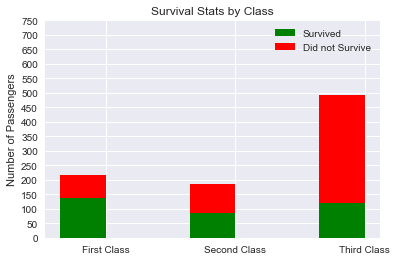

In [63]:
##Plotting percentages of people belonging to the first, second, third class who did/did not survive

N = 3
survivedMeans = (number_first_class_survived, number_second_class_survived, number_third_class_survived)
notsurvivedMeans = (number_first_class_notsurvived, number_second_class_notsurvived, number_third_class_notsurvived)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survivedMeans, width, color='g')
p2 = plt.bar(ind, notsurvivedMeans, width, color='r',
             bottom=survivedMeans)

plt.ylabel('Number of Passengers')
plt.title('Survival Stats by Class')
plt.xticks(ind + width/2., ('First Class', 'Second Class', 'Third Class'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Did not Survive'))

plt.show()

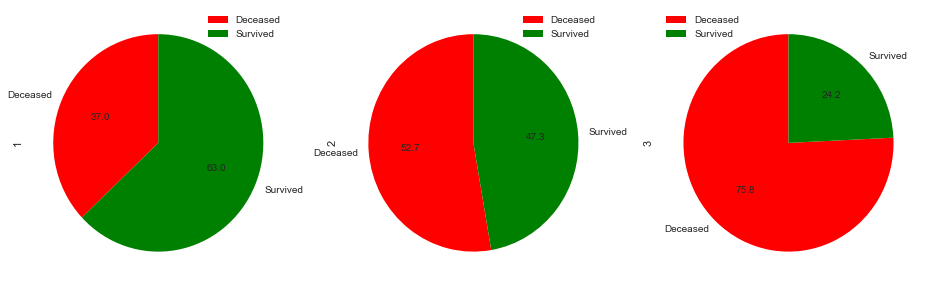

In [64]:

survived_class = pd.crosstab(testinfo.Pclass, testinfo.Survived.astype(bool))
transposed_survived_class = survived_class.transpose()
transposed_survived_class.plot(labels=['Deceased', 'Survived'], colors=['r', 'g'], kind='pie', subplots='True', rot=1, autopct='%.1f', startangle=90, figsize=[16,5]);

__Observation:__
The survival rate of a first class passenger is much higher than the survival rate of the second class passenger, and the survival rate of a second class passenger is much higher than the survival rate of a third class passenger
The survival rate of a higher class passenger is much higher than the survival rate of a lower class passenger.

Hypothesis test

Null Hypothesis Ho = Class of a passenger doesnt affect their survival.
Applying a **chi-square** for independence to test our null hypothesis.


In [65]:

table = pd.crosstab([testinfo['Survived']], testinfo['Pclass'])
chi2, p, dof, expected = sp.chi2_contingency(table.values)
results = [
    ['Item','Value'],
    ['Chi-Square Test',chi2],
    ['P-Value', p]
]
tbl.make_table(results)

Item,Value
Chi-Square Test,102.8890
P-Value,0.0000


The result has shown that P-value is less than 0.05 (95 % confidence) and we reject Ho so, it implies that survival rate is affected by Class . Alternatively this can be approached differently by calculating correlation.

In [66]:
##Correlation coefficient

pclass = testinfo['Pclass']

print correlation(pclass, survived)

-0.338481035961


The correlation check shows that the correlation is negative implying  lesser number of third class passengers survived as compared to the second class and lessser number of second class pasengers survived as compared to the third class passengers.


__Limitations of the dataset:__
1) There were a lot of missing data.
2) Only a sample of the data has been provided for analysis.

We can see in Age , cabin and embarked there are some missing entries and I applied the mean of the age to clean Age's data. But this could have skewed the actual data.
As this is only a sample of the data we do not know may be by analysing the actual data few results may suprisingly differ.

__Conclusion__

Observing  the proportion of survivors by gender, age and class, the data insinuates that women and children were given prefernce in evacuation . And also higher class passengers preferential treatment over other classes. This supports the notion of the seats in the lifeboats been given to Women and Children first. As quoted  "First of all, if you were a man, you were outta luck. The overall survival rate for men was 20%. For women, it was 74%, and for children, 52%. Yes, it was indeed "women and children first." - http://www.anesi.com/titanic.htm



__References:__ <pre>
[1]https://www.kaggle.com/c/titanic/data
[2]https://blog.dataiku.com/2014/05/12/getting-started-data-science-titanic-kaggle-part-1
[3]http://www.stat.columbia.edu/~gelman/arm/missing.pdf
[4]https://www.kaggle.com/omarelgabry/a-journey-through-titanic
[5]http://www.anesi.com/titanic.htm
</pre>